<a href="https://colab.research.google.com/github/11Veeraj/Cyclone-Prediction-LSTM/blob/main/MiniProject_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("/content/annualFrequency-1769-2019n.csv")
df_CD=pd.read_csv("/content/annualFrequency-1769-2019n.csv")
df.tail(252)


,Year,Cyclonic Disturbances - BOB,Cyclonic Disturbances - AS,Cyclonic Disturbances - TOTAL,Cyclones - TOTAL,Severe Cyclones - BOB,Severe Cyclones - TOTAL
0,1769,9,1,11,7,1,5
1,1770,8,2,14,4,1,5
2,1771,10,1,13,9,3,1
3,1772,8,1,16,8,0,4
4,1773,10,1,12,4,4,4
...,...,...,...,...,...,...,...
246,2015,3,5,12,4,0,2
247,2016,6,2,10,4,1,1
248,2017,8,0,10,3,2,2
249,2018,9,4,14,7,3,6


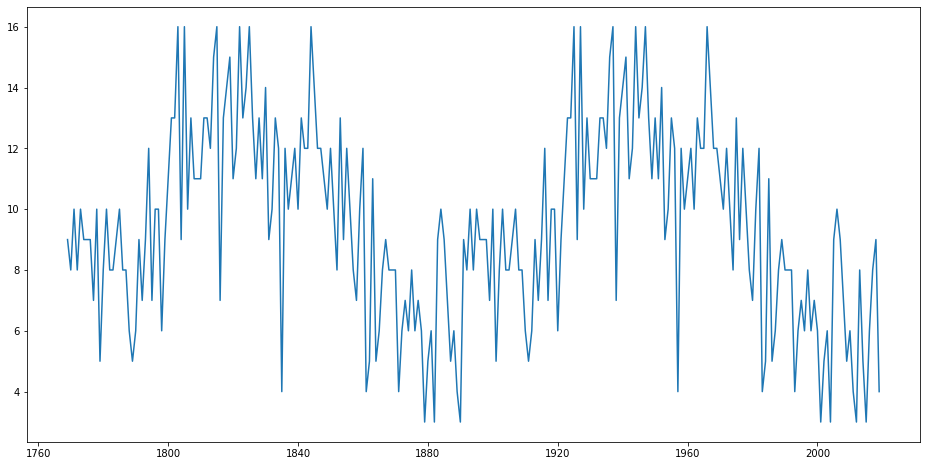

In [ ]:
df_CD["Year"]=pd.to_datetime(df.Year,format="%Y")
df_CD.index=df_CD['Year']

plt.figure(figsize=(16,8))
plt.plot(df_CD["Cyclonic Disturbances - BOB"],label='Cyclonic Disturbances - BOB')

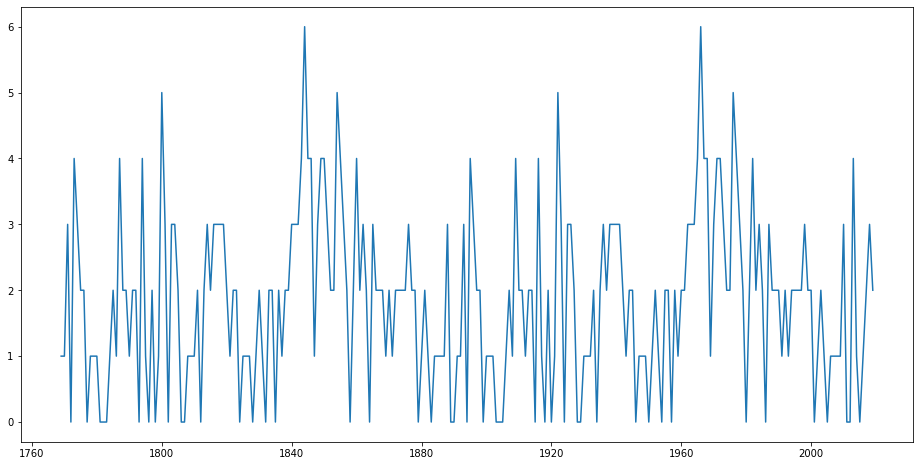

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_CD["Severe Cyclones - BOB"],label='Severe Cyclones - BOB')

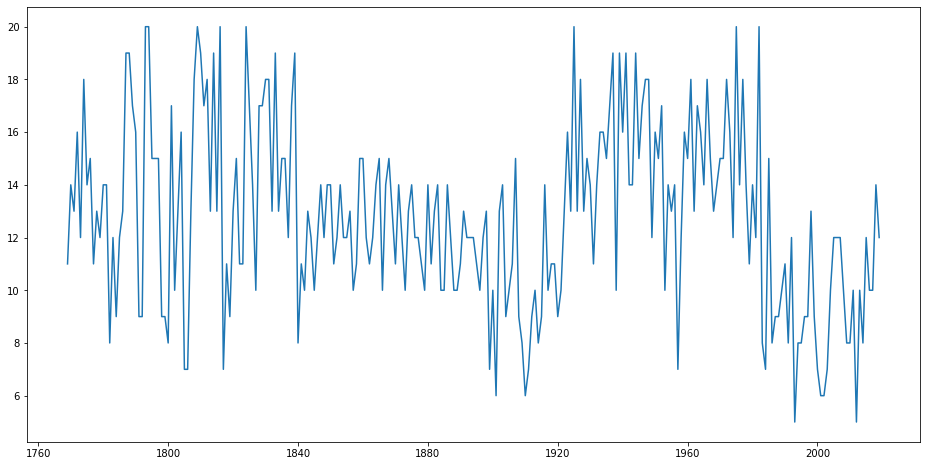

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_CD["Cyclonic Disturbances - TOTAL"],label='Cyclonic Disturbances - TOTAL')

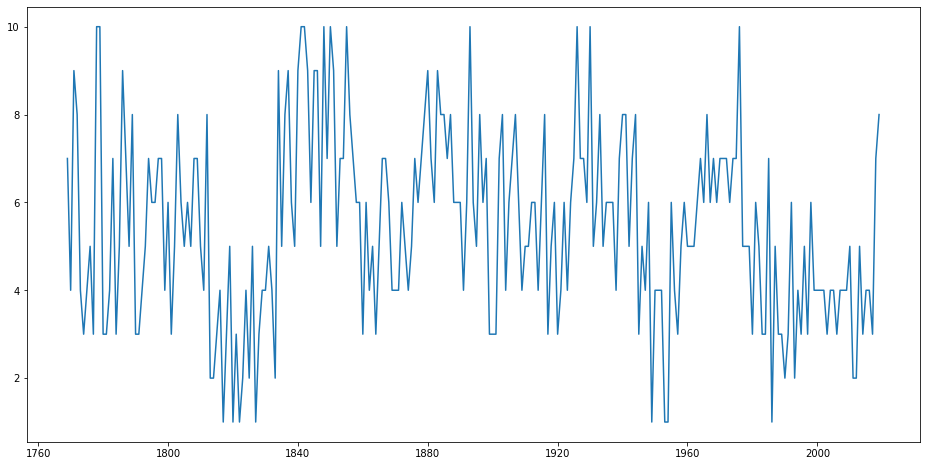

In [ ]:
df["Year"]=pd.to_datetime(df.Year,format="%Y")
df.index=df['Year']

plt.figure(figsize=(16,8))
plt.plot(df["Cyclones - TOTAL"],label='Cyclones')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Year','Cyclones - TOTAL'])

for i in range(0,len(data)):
    new_dataset["Year"][i]=data['Year'][i]
    new_dataset["Cyclones - TOTAL"][i]=data["Cyclones - TOTAL"][i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:200,:]
valid_data=final_dataset[200:,:]
#new_dataset.index=new_dataset.Year
#new_dataset.drop("Year",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

140/140 - 10s - loss: 0.0609


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
lstm_model.save("saved_model.h5")

/var/folders/qd/syw98gm56_n6lc6brp28m2ww0000gn/T/ipykernel_753/2048899411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


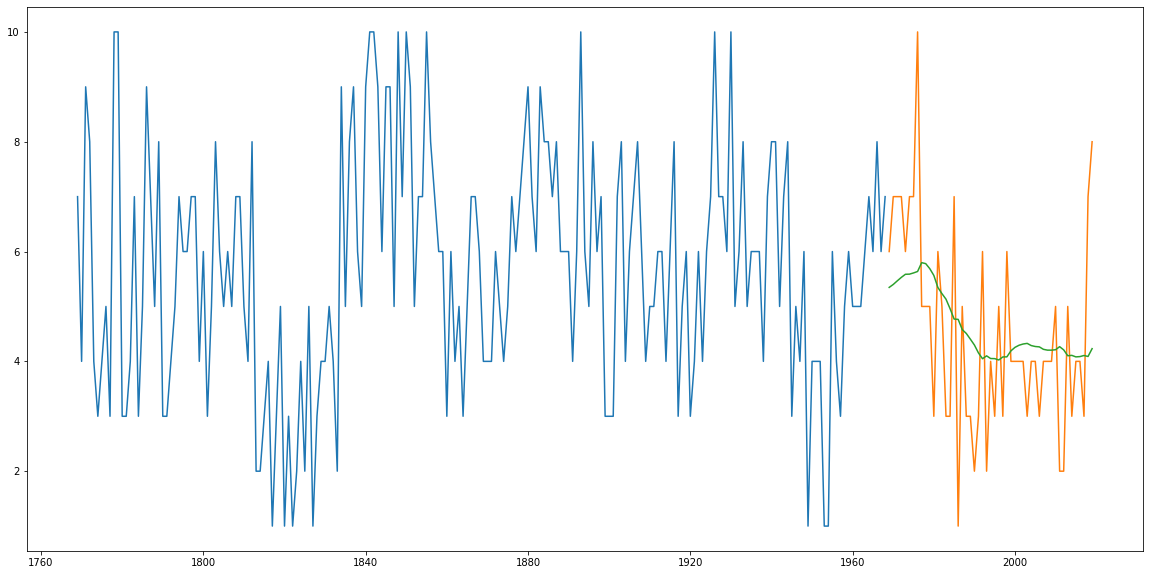

In [ ]:
train_data=new_dataset[:200]
valid_data=new_dataset[200:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Cyclones - TOTAL"])
plt.plot(valid_data[['Cyclones - TOTAL',"Predictions"]])

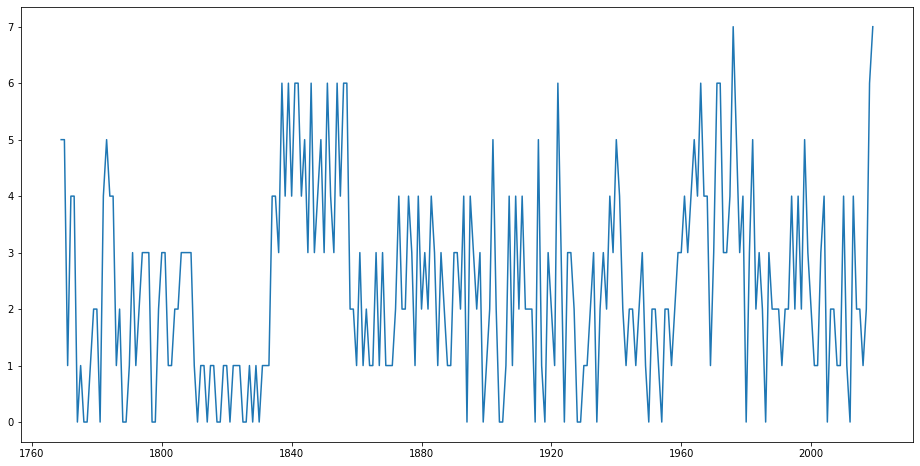

In [ ]:
df["Year"]=pd.to_datetime(df.Year,format="%Y")
df.index=df['Year']

plt.figure(figsize=(16,8))
plt.plot(df["Severe Cyclones - TOTAL"],label='Severe Cyclones')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Year','Severe Cyclones - TOTAL'])

for i in range(0,len(data)):
    new_dataset["Year"][i]=data['Year'][i]
    new_dataset["Severe Cyclones - TOTAL"][i]=data["Severe Cyclones - TOTAL"][i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:200,:]
valid_data=final_dataset[200:,:]
#new_dataset.index=new_dataset.Year
#new_dataset.drop("Year",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

140/140 - 9s - loss: 0.0597


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

In [ ]:
lstm_model.save("saved_model.h5")

/var/folders/qd/syw98gm56_n6lc6brp28m2ww0000gn/T/ipykernel_4099/64075476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


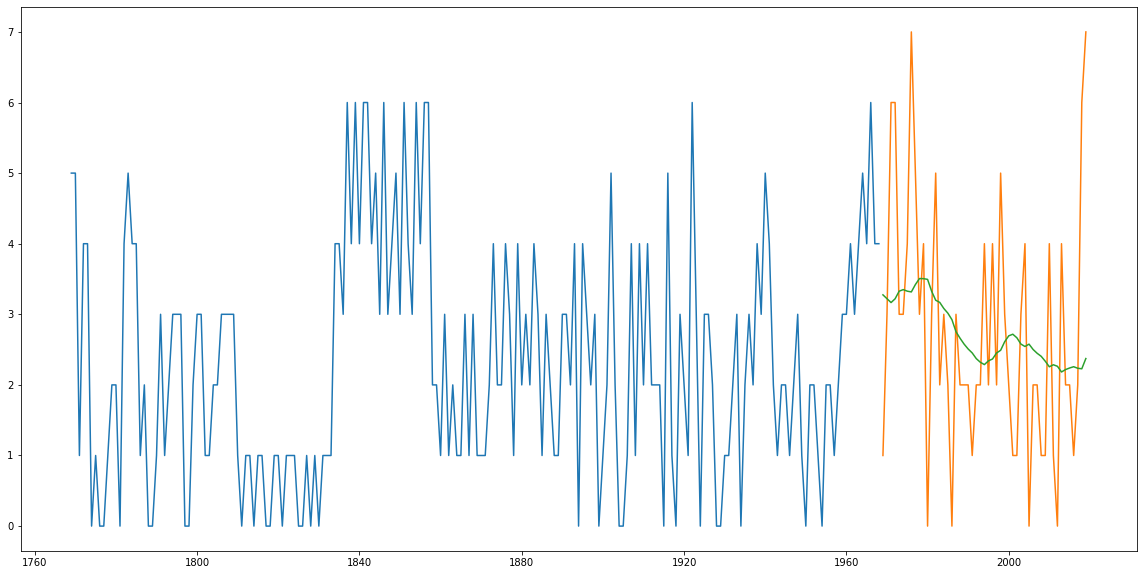

In [ ]:
train_data=new_dataset[:200]
valid_data=new_dataset[200:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Severe Cyclones - TOTAL"])
plt.plot(valid_data[['Severe Cyclones - TOTAL',"Predictions"]])